<a href="https://colab.research.google.com/github/sarthakpant772/MLnow_2.0/blob/main/car_dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import pandas as pd
import tensorflow as tf
import numpy as np
from tensorflow import keras
import os

In [4]:
cd '/content/drive/MyDrive/mashine_learning_models/car price'


/content/drive/MyDrive/mashine_learning_models/car price


In [5]:
ls

 CarPrice_Assignment.csv  'Data Dictionary - carprices.xlsx'   Untitled0.ipynb


In [6]:
car_data=pd.read_csv('CarPrice_Assignment.csv')

In [7]:
car_data.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [8]:
unicar_data=car_data[['horsepower','price']]

In [9]:
unicar_data.head()

,horsepower,price
0,111,13495.0
1,111,16500.0
2,154,16500.0
3,102,13950.0
4,115,17450.0


In [10]:
unicar_data.to_csv('univarit_cardata.csv')

##Data visualization

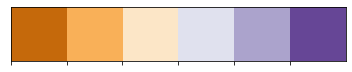

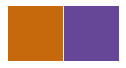

In [15]:
import seaborn as sns
sns.palplot(sns.color_palette('PuOr')) #Purple to Orange colors
pal = sns.color_palette('PuOr', 6) #print 6 color shades from Purple to Orange
pal.as_hex() #set hex code values for colors

import matplotlib.pyplot as plt
plt.style.use(['seaborn'])
sns_colors = ['#c6690c', '#664697'] #orange Purple hex codes
sns.set_palette(sns_colors) #set the palette as sns_colors 
sns.palplot(sns.color_palette(sns_colors)) #plot the color codes

In [12]:
unicar_data.columns

Index(['horsepower', 'price'], dtype='object')

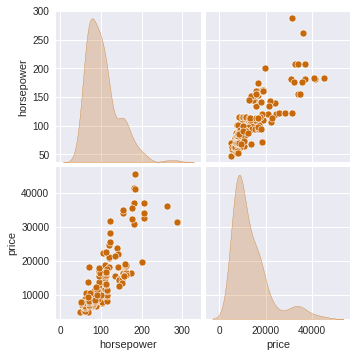

In [16]:
sns.pairplot(unicar_data,
             x_vars=['horsepower','price'],
             y_vars=['horsepower','price'],
             diag_kind='kde')

##Data Spliting

In [18]:
trainDataset=unicar_data.sample(frac=0.8,random_state=0)
testDataset=unicar_data.drop(trainDataset.index)

In [20]:
print(trainDataset.head())
print(testDataset.head())

     horsepower    price
52           68   6795.0
181         156  15750.0
5           110  15250.0
18           48   5151.0
188         100   9995.0
    horsepower      price
9          160  17859.167
21          68   5572.000
25          68   6692.000
29         145  12964.000
31          76   6855.000


In [21]:
print(trainDataset.shape)
print(testDataset.shape)

(164, 2)
(41, 2)


In [24]:
trainFeatures=trainDataset.copy()
testFeatures=testDataset.copy()

In [25]:
trainLabels=trainFeatures.pop('price')
testLabels=testFeatures.pop('price')

In [27]:
print(trainLabels.head())
print(testLabels.head())

52      6795.0
181    15750.0
5      15250.0
18      5151.0
188     9995.0
Name: price, dtype: float64
9     17859.167
21     5572.000
25     6692.000
29    12964.000
31     6855.000
Name: price, dtype: float64


In [29]:
print(trainFeatures.head())
print(testFeatures.head())

     horsepower
52           68
181         156
5           110
18           48
188         100
    horsepower
9          160
21          68
25          68
29         145
31          76


In [34]:
model = tf.keras.Sequential([
                             tf.keras.layers.Dense(1)

])


In [38]:
model.compile(
    loss = 'mean_absolute_error', #minimizing the MAE loss
    optimizer = tf.keras.optimizers.Adam(0.001), #learning rate specified as 0.001
    # optimizer = 'adam', #takes the default learning rate
    metrics = ['mae', 'mse'] #meanSquare and meanAbsolute error metrics
)

In [40]:
numEpochs=5000
history = model.fit(x=trainFeatures,y=trainLabels,validation_data=(testFeatures,testLabels), epochs=5000)

Streaming output truncated to the last 5000 lines.
Epoch 2501/5000
6/6 [==============================] - 0s 7ms/step - loss: 11232.5225 - mae: 11232.5225 - mse: 180720432.0000 - val_loss: 11836.3525 - val_mae: 11836.3525 - val_mse: 195242672.0000
Epoch 2502/5000
6/6 [==============================] - 0s 9ms/step - loss: 11231.8896 - mae: 11231.8896 - mse: 180703040.0000 - val_loss: 11835.6855 - val_mae: 11835.6855 - val_mse: 195224784.0000
Epoch 2503/5000
6/6 [==============================] - 0s 6ms/step - loss: 11231.2900 - mae: 11231.2900 - mse: 180687168.0000 - val_loss: 11835.0117 - val_mae: 11835.0117 - val_mse: 195206768.0000
Epoch 2504/5000
6/6 [==============================] - 0s 6ms/step - loss: 11230.6680 - mae: 11230.6680 - mse: 180670320.0000 - val_loss: 11834.3496 - val_mae: 11834.3496 - val_mse: 195189040.0000
Epoch 2505/5000
6/6 [==============================] - 0s 7ms/step - loss: 11230.0645 - mae: 11230.0645 - mse: 180653744.0000 - val_loss: 11833.6934 - val_mae: 1

In [41]:
print(history)

In [43]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 1)                 2         
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


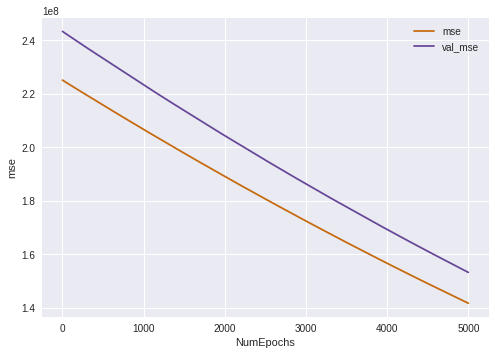

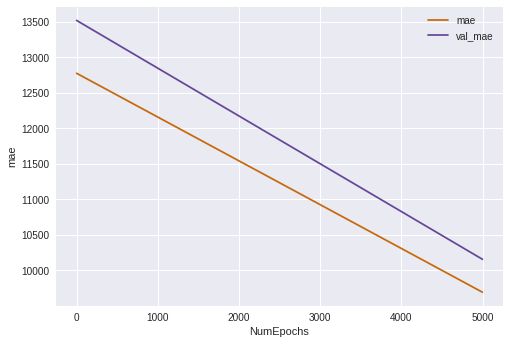

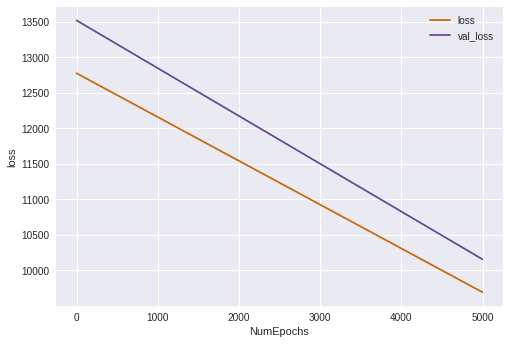

In [44]:
def curvePlots(tempString):
  plt.plot(history.history[tempString])
  plt.plot(history.history[f'val_{tempString}'])
  plt.xlabel('NumEpochs')
  plt.ylabel(tempString)
  plt.legend([tempString, f'val_{tempString}'])
  plt.show()


curvePlots('mse')
curvePlots('mae')
curvePlots('loss')

In [45]:
model.predict([111])

array([[3721.3467]], dtype=float32)

In [47]:
testPred=model.predict(testFeatures).flatten()

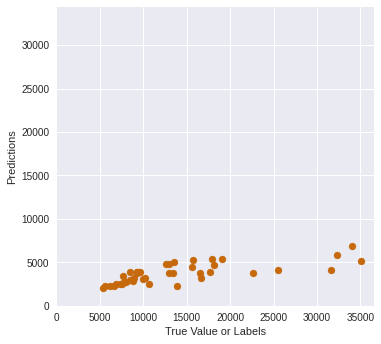

In [48]:
def predPlot(labels, predictions):
  plt.scatter(labels, predictions)
  plt.ylabel('Predictions')
  plt.xlabel('True Value or Labels')
  plt.axis('equal')
  plt.axis('square')
  plt.xlim([0, plt.xlim()[1]])
  plt.ylim([0, plt.ylim()[1]])
  plt.show()

predPlot(testLabels,testPred)

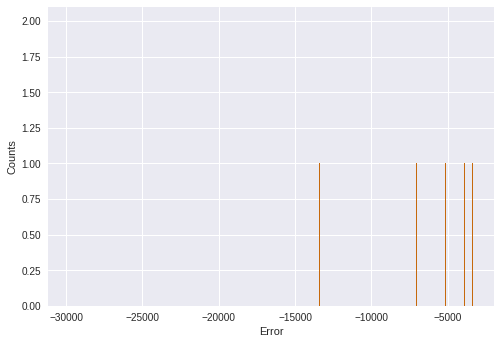

In [49]:
def errorPlot(preds, labels, counts):
  errors = preds - labels
  plt.hist(errors, counts)
  plt.xlabel('Error')
  plt.ylabel('Counts')
  plt.show()

errorPlot(testPred,testLabels,numEpochs)